In [2]:
%matplotlib inline
from __future__ import print_function
import numpy
import matplotlib.pyplot as plt

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# Midterm - Fall Semester 2018

Guidelines:
1. Use resources available to you from class and online.
1. That being said this is an individual effort, do not work with others and cite what you do use.
1. Copying is prohibited, write your own code and solutions.
1. Do not use campuswire for the duration of the exam!  
1. If you have a question please email the instructor and the TAs for maximal response possibilities.  We will answer questions that pertain only to clarification.
1. Late turn in of the midterm will result in a 10% reduction every HOUR that it is late.  If you feel that there is a special circumstance that warrants consideration tells us BEFORE the Tuesday (and more so before the exam starts).

Good luck!

## Question 1

Consider the three following three points:
$$
    x_i, x_i + \frac{\Delta x}{3}, ~\text{and}~ x_i + \frac{\Delta x}{2}.
$$

**(a)** [10] Derive a finite difference approximation to the first derivative of maximal order with these points.  Also determine the leading error term.

Solution: We need Taylor series for the finite difference scheme. 

Let $x_j = x_i + \frac{\Delta x}{3}$ and $x_k = x_i + \frac{\Delta x}{2}$,

Then,

$$f(x_j) = f(x_i + \frac{\Delta x}{3}) = f(x_i) + f'(x_i)\frac{\Delta x}{3} + \frac{f''(x_i)}{2} \frac{\Delta x^2}{9} + \frac{f'''(x_i)}{6} \frac{\Delta x^3}{27} + O(x^4)
$$

$$f(x_k) = f(x_i + \frac{\Delta x}{2}) = f(x_i) + f'(x_i)\frac{\Delta x}{2} + \frac{f''(x_i)}{2} \frac{\Delta x^2}{4} + \frac{f'''(x_i)}{6} \frac{\Delta x^3}{8} + O(x^4)
$$

Plugging these in and comparing like terms for weighting functions, we then get a set of equations:

$$ w_i + w_j + w_k = 0 \\
\frac{\Delta x}{3} w_j + \frac{\Delta x}{2} w_k = 1 \\
\frac{\Delta x}{18} w_j + \frac{\Delta x}{8} w_k = 0
$$

Then leads to 
$$w_i = -\frac{5}{\Delta x}, ~~~ w_j = \frac{9}{\Delta x}, ~~~ w_k = -\frac{4}{\Delta x}
$$

Putting this all together we have the finite difference scheme:
$$ f'(x) \approx -\frac{5}{\Delta x} f(x_i) + \frac{9}{\Delta x} f(x_i + \frac{\Delta x}{3}) -\frac{4}{\Delta x} f(x_i + \frac{\Delta x}{2})
$$

Then the leading error is 
$$\begin{aligned} 
R &= \frac{f'''(x_i)}{6} \frac{\Delta x^3}{27} \frac{9}{\Delta x} + \frac{f'''(x_i)}{6} \frac{\Delta x^3}{8} \frac{-4}{\Delta x} \\
&= -\frac{f'''(x_i)}{36} \Delta x^2 \\
&= O(\Delta x^2)
\end{aligned}$$

**(b)** [10] Derive a quadrature rule using the same points again defining the weights such that the resulting rule is of maximal order.

Solution: Given the above three points $x_i$, $x_j$, $x_k$, we may consider Gauss-Legendre rule.

For
$$
    I = \int^b_a f(x) dx \approx I_N = \int^1_{-1} f(x(\xi)) \frac{dx}{d\xi} d\xi = \frac{\Delta x}{4} \int^1_{-1} f(x(\xi)) d\xi
$$
$$\begin{aligned}
I_N[f] &= \sum_i w_i f(x(\xi_i)) \left . \frac{dx}{d\xi}\right|_{\xi_i}
\end{aligned}$$

In [$x_i$,  $x_i+\frac{\Delta x}{2}$],
$$\xi_0 = -\sqrt{\frac{3}{5}}, \xi_1 = 0, \xi_2 = \sqrt{\frac{3}{5}}
$$
with the weights 
$$w_0 = \frac{5}{9}, w_1 = \frac{8}{9}, w_2 = \frac{5}{9}$$
Then by affine transform,

$$x_0 = -\sqrt{\frac{3}{5}} \frac{\Delta x}{4} + x_i + \frac{\Delta x}{4} ~~~~ x_1 = x_i + \frac{\Delta x}{4} ~~~~ x_2 = \sqrt{\frac{3}{5}} \frac{\Delta x}{4} + x_i + \frac{\Delta x}{4}
$$
i.e.
$$\begin{aligned}
    f(x_0)&:  &x_0 & & w_0 = \frac{5}{9} \\
    f(x_1)&:  &x_1&   &w_1 = \frac{8}{9}\\
    f(x_2)&:  &x_2&  & w_2 = \frac{5}{9}\\
\end{aligned}$$

Therefore, 
$$I = \int^{x_i + \frac{\Delta x}{2}}_{x_i} f(x) dx \approx I_3 = \frac{\Delta x}{4}\left(\frac{5}{9}f(-\sqrt{\frac{3}{5}} \frac{\Delta x}{4} + x_i + \frac{\Delta x}{4}) + \frac{8}{9}f(x_i + \frac{\Delta x}{4}) + \frac{5}{9} f(\sqrt{\frac{3}{5}} \frac{\Delta x}{4} + x_i + \frac{\Delta x}{4})\right)
$$

**(c)** [5] Confirm the order of convergence for both methods you derived by plotting the results vs. an expected convergence rate.  Make sure to define your "sense" of error and pick an appropriate test function to demonstrate the convergence.

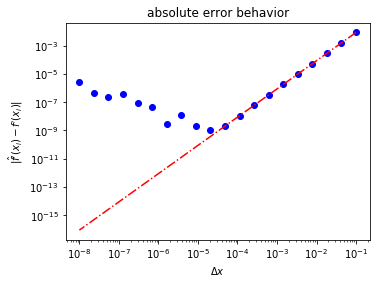

In [36]:
# define the error as absolute error for test
f = lambda x: numpy.cos(numpy.pi * x)
f_prime = lambda x: -numpy.pi * numpy.sin(numpy.pi * x)
delta_x = numpy.logspace(-1, -8, 20)
x_i = 10.5
abs_error = numpy.empty(delta_x.shape[0])

for (i, dx) in enumerate (delta_x):
    f_prime_new = -5.0 / (1.0 * dx) * f(x_i) + 9.0 / (1.0 * dx) * f(x_i + 1.0/3.0 * dx) - 4.0 / (1.0 * dx) * f(x_i + 0.5 * dx)
    
    abs_error[i] = numpy.abs(f_prime_new - f_prime(x_i))

order_C = lambda delta_x, error, order: numpy.exp(numpy.log(error) - order * numpy.log(delta_x))

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)

axes = fig.add_subplot(1,2,1)
axes.loglog(delta_x, abs_error, 'bo')
# convergence follow O(x^2)
axes.loglog(delta_x, order_C(delta_x[0], abs_error[0], 2.0) * delta_x **2.0, 'r-.', label = "2nd order")
axes.set_title("absolute error behavior")
axes.set_xlabel("$\Delta x$")
axes.set_ylabel("$|\hat{f}' (x_i) - f'(x_i) |$")


plt.show()

In [37]:
# define the error as absolute error for test
f = lambda x: numpy.cos(numpy.pi * x)
f_prime = lambda x: - numpy.pi * numpy.sin(numpy.pi * x)
f_int = lambda x: numpy.sin(numpy.pi * x) / numpy.pi
dx = numpy.logspace(-2, -8, 20)
x_i = 0.0
abs1_error = numpy.zeros(10)
abs2_error = numpy.zeros(10)

for i in range(dx.shape[0]):
    f_prime_new = -5.0 / (1.0 * dx) * f(x_i) + 9.0 / (1.0 * dx[i]) * f(x_i + 1.0/3.0 * dx[i]) - 4.0 / (1.0 * dx[i]) * f(x_i + 0.5 * dx[i])
    f_int_hat = (1.0 * dx[i]) / 4.0 * ( 5.0/9.0 * f(- (3.0 / 5.0)**0.5 * dx[i]/4.0 + x_i + dx[i] / 4.0) + 8.0 / 9.0 * f(x_i + 1.0/4.0 * dx[i]) + 5.0/ 9.0 * f((3.0 / 5.0)**0.5 * dx[i]/4.0 + x_i + 0.25 * dx[i])
    #error_p[i] = numpy.abs(f_prime_new - f_prime(x_i))
    abs2_error[i] = numpy.abs(f_int_hat - f_int(x_i))
    abs1_error[i] = numpy.abs(f_prime_new - f_prime(x_i))
                             
order_C = lambda dx, error, order: numpy.exp(numpy.log(error) - order * numpy.log(dx))

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)

axes = fig.add_subplot(1,2,1)
axes.loglog(dx, abs1_error, 'bo')
axes.loglog(dx, abs2_error, 'bo')
# convergence follow O(x^2)
axes.loglog(dx, order_C(dx[0], abs1_error[0], 2.0) * delta_x **2.0, 'r-.', label = "2nd order")
axes.loglog(dx, order_C(dx[0], abs2_error[0], 1.0) * delta_x **1.0, 'b-.', label = "1st order")

axes.set_title("absolute error behavior of both methods")
axes.set_xlabel("$\Delta x$")
axes.set_ylabel("$|\hat{f}' (x_i) - f'(x_i) |$")
axes.set_

plt.show()
# no idea of my error


SyntaxError: invalid syntax (<ipython-input-37-f80bcb081461>, line 14)

## Question 2

Bernoulli's equation for fluid flow in an open channel with a small bump is
$$
    \frac{F^2}{2 g w^2 h_0^2} + h_0 = \frac{F^2}{2 g w^2 h^2} + h + H
$$
where $F$ is the volume of rate flow ($m^3/s$), $g$ is gravitational acceleration ($m/s^2$), $w$ the width of the channel ($m$), $h_0$ the upstream water level ($m$), $H$ the height of the bump ($m$), and $h$ is the water level above the bump ($m$).  

**(a)** [6] We are trying to find the value $h$ given the values $F, g, w, h_0, ~\text{and}~ H$ using a root finding procedure.  Reformulate Bernoulli's equation so that the problem has the form required to treat it as a root finding problem.  We will also eventually want to apply Newton's method so also find the derivative that we will need to use.  For this case use the following values as constants:
$$
    F=1.2, g=9.81, w=2.5, h_0=2.3, H=1.0
$$

Solution: Our goal is to give an equation in solving for the root $h$.
Using $h$ as a variable, then transform the Bernoulli's equation into: 
$$
 \frac{F^2}{2gw^2} \times (\frac{1}{h_0^2} - \frac{1}{h^2}) = h + H - h_0
$$

To get the form in root finding function $f(h)$ and let $f(h) = 0$:
$$
 f(h) = \frac{F^2}{2gw^2} \cdot (\frac{1}{h_0^2} - \frac{1}{h^2}) + h_0 -h - H = 0
$$
is the form needed for root finding.

Besides, the derivative of function f is: 
$$ f'(h) = \frac{F^2}{gw^2h^3} - 1
$$

**(b)** [7] Write a set of functions that use the bisection method and Newton's method to find the roots of the functions you formulated in part (a).  Make sure to handle the case where the method does not converge.

In [7]:
def f(h):
    F = 1.2
    g = 9.81
    w = 2.5
    h_0 = 2.3
    H = 1.0
    return F**2 / (2.0 * g * w**2) * (1.0 / (h_0**2) - 1.0/ h**2 ) + h_0 - h - H

def f_prime(h):
    F = 1.2
    g = 9.81
    w = 1.8
    h_0 = 0.6
    H = 0.075
    return F**2 / (g * w**2 * h**3) - 1.0

# bisection
def bisection(bracket, tolerance=1e-6, max_steps=100):
    x_a = bracket[0]
    x_b = bracket[1]
    dx = x_b - x_a
    x_c = x_a + dx / 2.0
    f_a = f(x_a)
    f_b = f(x_b)
    f_c = f(x_c)
    
    success = False
    for n in range(1, max_steps+1):
        if numpy.abs(f_c) < tolerance:
            success = True
            break
        
        if numpy.sign(f_a) != numpy.sign(f_c):
            x_b = x_c
            f_b = f_c
        else: 
            x_a = x_c
            f_a = f_c
        dx = x_b - x_a
        x_c  = x_a + dx / 2.0
        f_c = f(x_c)
        
    if n == max_steps:
        raise ArithmeticError()
    
    else:
        return x_c, n
    
#newton
def newton(h_0, tolerance=1e-6, max_steps=100):
    x_k = h_0
    success = False
    for n in range(1, max_steps+1):
        x_k = x_k - f(x_k) / f_prime(x_k)
        if numpy.abs(f(x_k)) < tolerance:
            success = True
            break
            
    if n == max_steps:
        raise ArithmeticError()
    else:
        return x_k, n

In [8]:
brackets = [[0.05, 1.0], [1.0, 2.0]]
true_value = [0.09878249410539865, 1.295219898223877]
for (i, bracket) in enumerate(brackets):
    numpy.testing.assert_allclose(bisection(bracket, tolerance=1e-8)[0], true_value[i], atol=1e-8)
    numpy.testing.assert_allclose(newton(bracket[0], tolerance=1e-8)[0], true_value[i], atol=1e-3)
try:
    bisection([2.0, 3.0])
    newton(10.0)
except ArithmeticError as e:
    pass
else:
    assert(False)
print("Success!")

Success!


**(c)** [6] Plot your results for both of the brackets defined in the testing cell above providing some visual proof that you have found the correct value of the root.

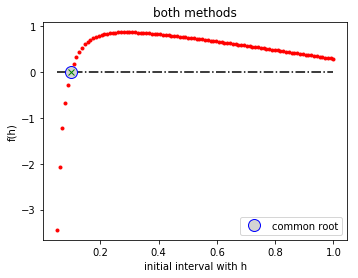

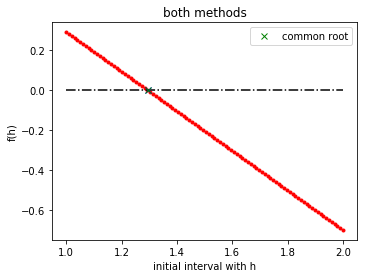

In [19]:
#first interval and guess
xa, t1 = bisection([0.05, 1.0], tolerance=1e-8)
xb, t2 = newton(0.05, tolerance=1e-8)

h = numpy.linspace(0.05, 1.0, 100)

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)

axes = fig.add_subplot(1,2,1)
axes.plot(h, f(h), 'r.')
axes.plot(h, numpy.zeros(h.shape), 'k-.')
axes.plot(xa, f(xa), "o", color="b", markerfacecolor="lightgray", markersize="12", label="common root")
axes.plot(xb, f(xb), 'gx')
axes.set_title("both methods")
axes.set_xlabel("initial interval with h")
axes.set_ylabel("f(h)")
axes.legend(loc=4)

#second interval and guess
xc, t3 = bisection([1.0, 2.0], tolerance=1e-8)
xd, t4 = newton(1.0, tolerance=1e-8)

h_new = numpy.linspace(1.0, 2.0, 100)

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)

axes = fig.add_subplot(1,2,2)
axes.plot(h_new, f(h_new), 'r.')
axes.plot(h_new, numpy.zeros(h.shape), 'k-.')
axes.plot(xc, f(xc), 'bx')
axes.plot(xd, f(xd), 'gx', label = "common root")
axes.set_title("both methods")
axes.set_xlabel("initial interval with h")
axes.set_ylabel("f(h)")
axes.legend(loc=1)

plt.show()

**(d)** [6] Now compare the convergence of the methods you wrote.  Plot the tolerance vs. the number of steps used to reach the tolerance for both the bisection method and Newton's method you implemented.  Comment on the results.  Make sure to label the axis, use a title, and provide a legend.

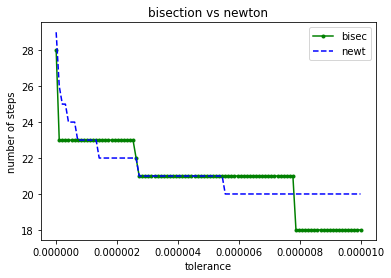

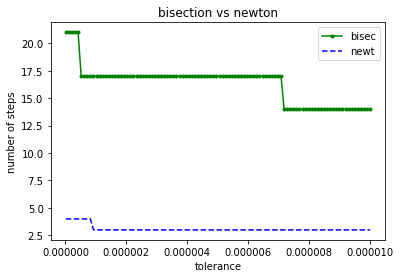

In [5]:
tolerance = numpy.linspace(1e-8, 1e-5, 100)
t1 = numpy.zeros(100)
t2 = numpy.zeros(100)

for i in range(tolerance.shape[0]):
    xa, t1[i] = bisection([0.05, 1.0], tolerance[i])
    xb, t2[i] = newton(0.05, tolerance[i])
    
fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.plot(tolerance, t1, 'g.-', label = "bisec")
axes.plot(tolerance, t2, 'b--', label = "newt")

axes.set_title("bisection vs newton")
axes.set_xlabel("tolerance")
axes.set_ylabel("number of steps")

axes.legend(loc = 1)
plt.show()

tolerance1 = numpy.linspace(1e-8, 1e-5, 100)
t3 = numpy.zeros(100)
t4 = numpy.zeros(100)

for i in range(tolerance.shape[0]):
    xc, t3[i] = bisection([1.0, 2.0], tolerance[i])
    xd, t4[i] = newton(1.0, tolerance[i])
    
fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.plot(tolerance, t3, 'g.-', label = "bisec")
axes.plot(tolerance, t4, 'b--', label = "newt")

axes.set_title("bisection vs newton")
axes.set_xlabel("tolerance")
axes.set_ylabel("number of steps")

axes.legend(loc = 1)
plt.show()

Solution: it is clear from the above two pics of the comparison showing the differences between using two methods. 

In both intervals and corresponding intitial guess point, as tolerance becomes smaller the number of steps need for bisection method is obviously greater than the steps needed for newton method.  Since the convergence rate for them are substantially different from each other. 

Newton method is quadratically convergent while bisection method is linearly convergent.

In the first pic, the number of steps needed for both methods have some intersection. This might be the result of narrow interval and intial guess selection. But in general, the steps needed for newton method is fewer than those for bisection if we want the tolerance as small as possible.

## Question 3
Given two functions $f(x)$ and $g(x)$ and their interpolants $\mathcal{P}_n(x)$ and $\mathcal{Q}_m(x)$ respectively determine the following analytically given that $n \geq m$.

**(a)** [10] Let $x_i \in X_f$ be the coordinates that define $\mathcal{P}_n(x)$ and $x_j \in X_g$ be the coordinates that define $\mathcal{Q}_m(x)$.  What conditions on the $X_f$, $X_g$, $n$ and $m$ must we place on these such that $\mathcal{P}_n(x) + \mathcal{Q}_m(x)$ is the interpolating polynomial for $f(x) + g(x)$?

Solution: Conditions are that coordinates $x_i$ and $x_j$ belong to the intersection, $\mathcal{T}$, of the set $X_f$ and the set $X_g$ such that the number of coordinates (elements) in $\mathcal{T}$ is $n+1$, and $n = m$. 

i.e. 
$$x_i, x_j \in \mathcal{T} = X_f \cap X_g,~~~~n = m$$
with $n+1$ points in $\mathcal{T}$.

Proof: 

1. Since the degree of $\mathcal{P}_n(x) + \mathcal{Q}_m(x)$ is at most the maximum of of the degrees of $\mathcal{P}_n(x)$ and $\mathcal{Q}_m(x)$. 

Then deg($\mathcal{P}_n(x) + \mathcal{Q}_m(x)$) $\leq$ max{m, n} = n. 

Therefore, by the uniqueness of polynomial interpolation, $\mathcal{P}_n(x) + \mathcal{Q}_m(x)$ has $n+1$ distinct coordinates (points) that define itself, a polynomial of degree no greater than n.

Note that by the existence of polynomial interpolation, the degree of $\mathcal{P}_n(x)$ or $\mathcal{Q}_m(x)$ is no greater than $n$ or $m$, correspondingly.

2. If m $\ne$ n, then there must exist some points $x_i$ in $X_f$ that define $\mathcal{P}$, such that they are not interpolation points for $\mathcal{Q}$, which means we can not guarantee that for such $x_i$, $\mathcal{Q}_m(x_i)$ = $g(x_i)$. 

i.e. 
$$ \mathcal{P}_n(x_i) + \mathcal{Q}_m(x_i) \ne f(x_i) + g(x_i)
$$

or $\mathcal{Q}_m(x_i)$ is an undefined interpolation for $g(x)$.

3. Last, we have to preserve that $x_i, x_j \in \mathcal{T} = X_f \cap X_g$. If some $x_i$ are not selected from $\mathcal{T}$, then $x_i$ can not be the interpolation point for $\mathcal{P}_n(x) + \mathcal{Q}_m(x)$, since we don't whether $\mathcal{Q}(x_i)$ is for $g$ or not.

**(b)** [5] Given the previous constraints on $X_f$, $X_g$, $n$ and $m$, find the order of the interpolating polynomial $\mathcal{P}_n(x) + \mathcal{Q}_m(x)$ and an error bound.

Solution: The order of the interpolating polynomial $\mathcal{P}_n(x) + \mathcal{Q}_m(x)$ is at most the maximum of of the degrees of $\mathcal{P}_n(x)$ and $\mathcal{Q}_m(x)$.  

i.e. given $n \geq m$, the order $N$ of $\mathcal{P}_n(x) + \mathcal{Q}_m(x)$ is 
$$N = deg(\mathcal{P}_n(x) + \mathcal{Q}_m(x)) \leq max\left\{ m, n \right\}= n $$

We know from the remainder theorem of interpolating polynomials, that 
$$
    f(x) + g(x) = \left(\mathcal{P}_n(x) + \mathcal{Q}_m(x)\right) + R_N(x)
$$
where error $R_N(x)$ is that 
$$R_N(x) = \omega(x) \frac{(f+g)^{(N+1)}(\xi)}{(N+1)!} \quad \text{with} \quad \xi \in [a, b]
$$
with
$$
    \omega(x) = \prod^{N \leq n}_{i=0} (x - x_i) = (x-x_0)(x-x_1)\cdots(x-x_N) .
$$
[a, b] is the domain of $f(x) + g(x)$. min{$x_i$}$\leq$ $\xi$ $\leq$ max{$x_i$}.

Therefore, the error $R_N(x)$ has upper bound 
$$\left|R_N(x) \right| = \left| \omega(x) \frac{(f+g)^{(N+1)}(\xi)}{(N+1)!} \right| \leq \frac{1}{(N+1)!}M_{N+1} T_{N+1}
$$
where

$$M_{N+1} = \mathop{max}_{a\leq x \leq b} \left| (f+g)^{(n+1)}(x) \right|, ~~T_{N+1} = \omega(x) = \prod^{N \leq n}_{i=0} (x - x_i)
$$
with $x_i \in X_f$.

Then the error bound of $R_N(x)$ of polynomial $\mathcal{P}_n(x) + \mathcal{Q}_m(x)$ is
$$\left|R_N(x) \right| = \left| \omega(x) \frac{(f+g)^{(N+1)}(\xi)}{(N+1)!} \right| \leq \frac{1}{(N+1)!}M_{N+1} T_{N+1}
$$


**(c)** [10] Let $x_i \in X_f$ be the coordinates that define $\mathcal{P}_n(x)$ and $x_j \in X_g$ be the coordinates that define $\mathcal{Q}_m(x)$.  What condition on the $X_f$, $X_g$, $n$ and $m$ must we place on these such that $\mathcal{P}_n(x) \cdot \mathcal{Q}_m(x)$ is the interpolating polynomial for $f(x) \cdot g(x)$

Solution: Let $\mathcal{S}(x) = \mathcal{P}_n(x) \cdot \mathcal{Q}_m(x)$, the degree of $\mathcal{S}(x)$ is equal to the sum of the degrees of $\mathcal{P}$ and $\mathcal{Q}$. 

Then 
$$deg(\mathcal{S}) = deg(\mathcal{P}_n(x) \cdot \mathcal{Q}_m(x)) \leq n + m $$

By the uniqueness of interpolating polynomial, $\mathcal{S}(x)$ has m+n+1 distinct points that define itself:
$$\mathcal{S}(x) = \sum^{deg(s) \leq m+n}_{k=0}\left(\sum_{i+j=k}p_i \cdot q_j\right) x^k ~~~~ i,j \geq 0.
$$

Since $\mathcal{S}$ requires n+m+1 distinct coordinates to support itself, all $x_i$, $x_j$ have to belong to the set $\mathcal{T}$.

(Condition here)

The conditions needed for the case of $\mathcal{S}$ are that:
$$x_i, x_j \in \mathcal{T} = X_f \cap X_g,~~~~n = m$$
with $2n+1$ points in $\mathcal{T}$.

$m=n$ and $\mathcal{T}$ guarantee that $\mathcal{S}(x) = \mathcal{P}_n(x) \cdot \mathcal{Q}_m(x) = f(x) \cdot g(x)$, for all points in set $\mathcal{T}$, is under closed multiplication. That is to say, each has point has defintion of "interpolation point" for both $\mathcal{P}$ and $\mathcal{Q}$.

Basically, we first define $\mathcal{P}$ of degree no greater than n with n+1 points, and let the rest n points still be interpolation point of $\mathcal{P}$ for $f$. 

2n+1 points guarantee the uniqueness of $\mathcal{S}(x)$.

## Question 4

[25] You are an instructor tasked with explaining how floating point error can enter into numerical approximations in a given field (choose your favorite).  Outline a short lecture (~10 minutes) making sure to relate it to your field of choice and find two illustrative examples.  Here we are looking for specific examples from your own field and how you might relate the issues faced to your interests.  Whichever field you do address make sure to define the problems of interest.  You are of course free to use the lecture notes as jumping off-point but make sure to relate to your topic of interest.  Given the open ended nature of this problem feel free to ask the TAs or instructor questions about appropriate scope and anything else that comes up.

Lecture: Floating point error operations in "lmiits problems" in applied math

We are often faced with problems related to limit condition. Sometimes these problems cannot be solved analytically probably because the properties of certain functions. Let's see some of them which may introduce "blow up" condition.

#1 
Consider the function
$$
    f(x) = \frac{\sin 2x}{x^2}
$$
with $x\in[-10^{-1}, 10^{-1}]$.  

Our goal is using floating point operations to check the solution given by L'Hospital's rule. 

So as x approaches zero, $x \rightarrow 0$ we can see that:
$$
    \lim_{x \rightarrow 0} \frac{\sin 2x}{x^2} = \lim_{x \rightarrow 0} \frac{2 \sin x \cos x}{2 x} = \lim_{x \rightarrow 0} \frac{\cos x}{1} = \cos 0 = 1.
$$

Then let the error between floating point operation and the exact solution to the limit be $e$:
$$ e = 1 - \frac{\sin 2x}{x^2}
$$
with $x\in[-10^{-1}, 10^{-1}]$.  

We expect that for sure $e = 0$ when x approaches zero.

But we can see from the below that the error blows up to a huge number beyond expectation. 

And if we constrain the domain to a much smaller interval, say $x\in[-10^{-3}, 10^{-3}]$, we can hardly find any discrete value points of the above function when we use floating point operation.


Basically, floating point operation gives discrete value when distributed with continuous domain of the variable. Therefore, we have to trust calculation by classical mathematical theory when dealing with the problem related to limits. 

Text(0,0.5,'Relative Error')

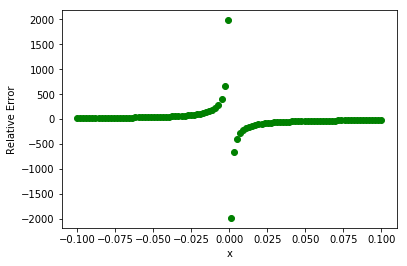

In [14]:
x = numpy.linspace(-1e-1, 1e-1, 100, dtype=numpy.float32)
error = (1.0 - (numpy.sin(2.0 * x)) / x**2)

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x, error, 'go')
#axes.set_ylim((-100.0, 100.0))
axes.set_xlabel("x")
axes.set_ylabel("Relative Error")

Apart from that, we can see clearly that if we choose equaliy spaced points or coordinates on x-axis,  the curve fitting will become different when choosing increasing number of points. 

#2 
More precisely, we can see that the y-axis values are close to different bounds when distributed or solved by distored coefficients. And this makes the curve they fit much stranger even if we analytically can not solve for the PDE by given boundary values. 

This semester, I am also in class of Partial Differential Equations, so let's try with an simple case of equilibrium state linear equation. 

Let $\frac{\partial u}{\partial t} = 0$ to get equilibrium state of the equation:
$$ \frac{\partial ^2 u}{\partial x^2} + u = 0.
$$
for (0, $\pi$) with boundary condition 
$$u(0) = a, ~~u(\pi) = b
$$
Then we have eigenvalue $\lambda = \pm i$, with 
$$u(x) = A \sin x + B \cos x
$$
But we may plug in some subtle boundary values for observation. 

By simple algebra in periodical issue, we see that if given
$$u(0) = 1, ~~u(\pi) = 1
$$
We can get weird coefficients since A = 0 by nature while B is unsolvable.

We can see from below that as the points increase, the upper bounds are correspondinly become bigger even the equation is unsolvable. 

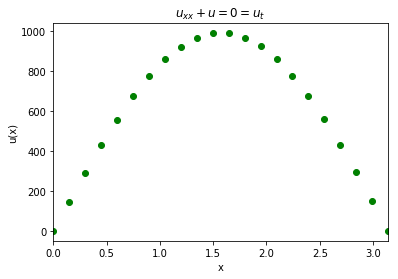

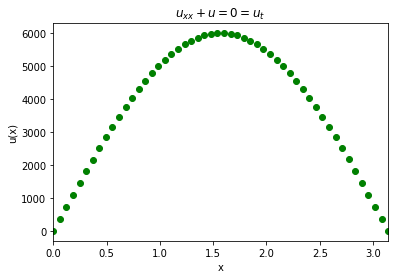

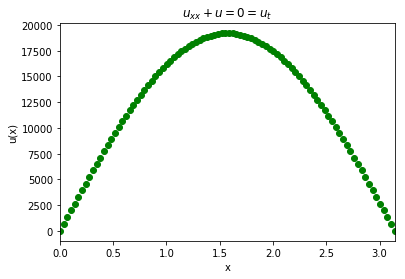

In [9]:
def maxA(N, dx):
    A = numpy.zeros((N, N))
    diagonal = numpy.ones(N)
    A += numpy.diag(diagonal * -2.0, 0) / dx**2
    A += numpy.diag(diagonal [ :-1], 1) / dx**2
    A += numpy.diag(diagonal [ :-1], -1) / dx**2
    A += numpy.diag(diagonal, 0)
    
    return A

def solve_BVP(a, b, c, d, N=50):
    u_a = c
    u_b = d

    dx = (b-a) / (N+1)
    x_cd = numpy.linspace(a, b, N+2)
    x = x_cd[1:-1]
    
    A = maxA(N, dx)
    b = numpy.zeros(x.shape)
    b[0] -= u_a / dx**2 - u_a
    b[1] -= u_b / dx**2 - u_b
    u = numpy. empty(N+2)
    u[0] = u_a
    u[-1] = u_b
    u[1:-1] = numpy.linalg.solve(A, b)
    
    return x_cd, u


for N in [20, 50, 90]:
    x, u = solve_BVP(0.0, numpy.pi, -1, -1, N)
    
    fig = plt.figure()
    axes = fig.add_subplot(1,1,1)
    axes.plot(x, u, 'go')
    
    axes.set_title("$u_{xx} + u = 0 = u_{t}$")
    axes.set_xlabel("x")
    #axes.text(0.5 * numpy.pi, u(0.5*numpy.pi), "upper bound", fontsize ="12")
    axes.set_xlim((-0.1, 4))
    axes.set_ylabel("u(x)")
    axes.set_xlim([0.0, numpy.pi])
plt.show()


According to the comparison pics above, the upper bound becomes bigger as the number of points increases. We can then fairly expect that the upper bound will approach a huge number on y_axis if we plot by more points. And the upper bound shows that it is accompanied with $x = \frac{\pi}{2}$. 

Since the equation can not be solved analytically, we are surprised by the effort shown by floating point operation. This is because floating point operations are under discrete distributed value if we plot the points by dots, and when dealing with problems related to limits, floating point error always comes up.

This is what I can show in the operations of floating point error in the field of applied math.